<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B7%5D%EB%B8%8C%EB%9E%9C%EB%93%9C%EC%84%A0%ED%83%9D_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망을 사용하여 브랜드 선택을 학습하여 보자

# 데이터 불러오기
데이터파일 이름을 지정한 후, 해당 파일을 코랩에 마운트하고
필요한 라이브러리를 불러온다


In [0]:
## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical;  from matplotlib import style

!git clone https://github.com/hongjai-rhee/public.git
 

Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 379 (delta 12), reused 7 (delta 3), pack-reused 353
Receiving objects: 100% (379/379), 9.77 MiB | 29.86 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [0]:
## 데이터 불러오기  
dat = pd.read_csv('/content/public/choice500.csv')
dat.head()


,age,male,heavy,price1,price2,price3,ad1,ad2,ad3,disp1,disp2,disp3,buy
0,63,0,0,1.75,1.30,1.73,1,1,1,0,1,1,2
1,29,1,1,1.65,1.43,1.66,1,1,1,0,0,1,3
2,30,1,1,1.62,1.53,1.76,0,0,0,1,0,0,1
3,53,1,1,1.52,1.53,1.76,1,0,1,1,1,1,3
4,55,0,0,1.83,1.62,1.67,1,0,1,0,0,0,3


# 데이터의 구조를 살펴보자

X= 고객특성
[[63.    0.    0.    1.75  1.3   1.73  1.    1.    1.    0.    1.    1.  ]
 [29.    1.    1.    1.65  1.43  1.66  1.    1.    1.    0.    0.    1.  ]
 [30.    1.    1.    1.62  1.53  1.76  0.    0.    0.    1.    0.    0.  ]
 [53.    1.    1.    1.52  1.53  1.76  1.    0.    1.    1.    1.    1.  ]
 [55.    0.    0.    1.83  1.62  1.67  1.    0.    1.    0.    0.    0.  ]
 [57.    0.    0.    1.86  1.63  1.72  1.    0.    0.    0.    1.    1.  ]
 [31.    0.    1.    1.64  1.85  1.62  0.    0.    1.    1.    1.    0.  ]
 [30.    1.    0.    1.75  1.67  1.78  1.    1.    1.    0.    0.    1.  ]
 [37.    1.    1.    1.87  1.37  1.77  1.    1.    0.    1.    1.    1.  ]
 [44.    1.    0.    1.76  1.9   1.74  0.    0.    1.    0.    1.    0.  ]]


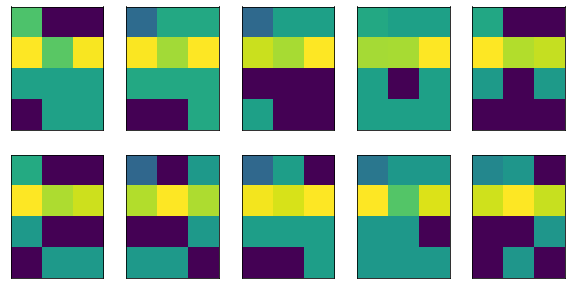

y=선택 브랜드의 원핫 코드
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [0]:
## 1. 데이터 살펴보기  
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=dat[:,ncol-1]-1  
y = to_categorical(y)

print('X= 고객특성')
print(np.around(x[0:10,:],2))      # 고객특성(나이, 성별, 헤비유저), 3개 브랜드의 (가격, 광고, 스페셜 디스플레이 여부)

class_names = ['nabisco', 'keebler', 'sunshine']    ## 브랜드 이름

# X 벡터를 이미지로 시각화
import copy 
z=copy.copy(x)
z[:,0]=z[:,0]/50
z = z.reshape(nrow, 4,3)

plt.figure(figsize=(10,5))
for i in range(10) :
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(z[i])
plt.show()
print('y=선택 브랜드의 원핫 코드')
print(y[0:10])                     # 선택된 브랜드  

# 학습 파라미터를 설정하자

In [0]:
hidden_neuron=4      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=200; BATCH=32  ## 학습횟수 
test = 0.2           ## 데이터 중 테스트셋의 비율 


# 모형을 설정하고 학습시키자



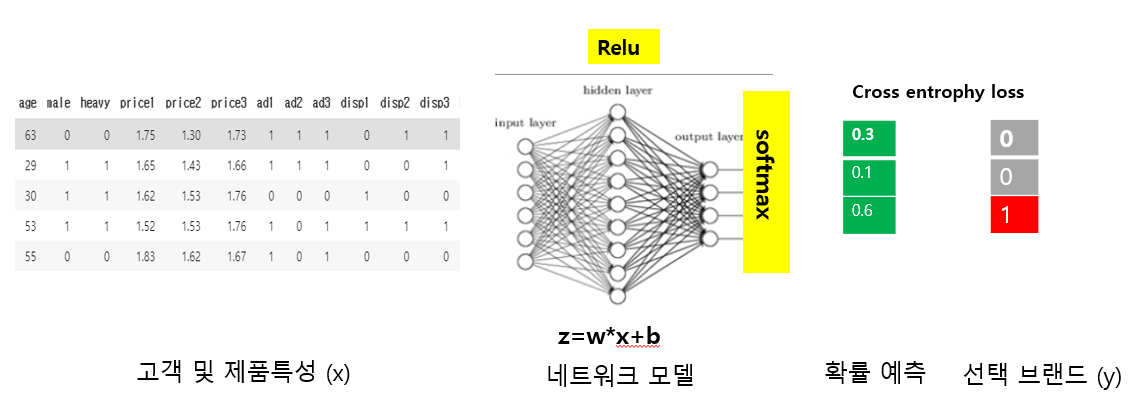

In [0]:

#### 이 아래는 자동으로 실행됨
## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(y_train.shape[1], input_dim=x_train.shape[1], activation='softmax'))## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax')) ## 은닉층=1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()

# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['acc'], label='Accuracy', color='darkred')
plt.plot(range(EPOCH), hist.history['val_acc'], label='Validation Accuracy', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('accuracy(%)'); plt.title('red=train, blue=validation'); plt.show()
model.summary()

# 학습된 모형을 사용하여 예측하기

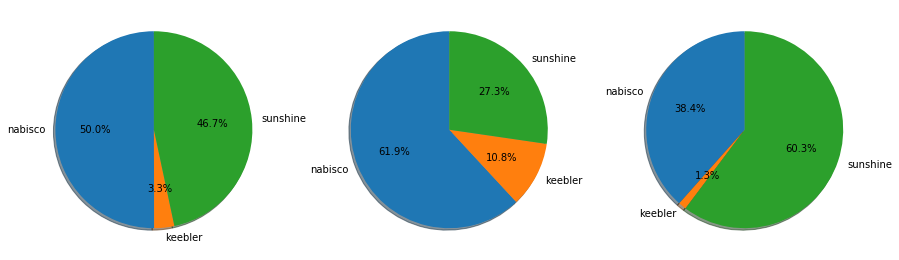

In [0]:

# 6. 예측하기 
x_new= x_test[0:3]; x_new; yhat = model.predict(x_new)

plt.figure(figsize=(15,205))
for i in range(3) :
    ratio = yhat[i]; plt.subplot(1,3,i+1); plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.pie(ratio, labels=class_names, shadow=True, startangle=90, autopct='%0.1f%%')
plt.show()


# X가 주어졌을 때 확률적인 구매예측을 해보자

In [0]:
y_pred=np.argmax(yhat,axis=1)
print("age male heavy  price1 price2 price3 adv1 adv2 adv3  disp1 disp2 disp3")

for i in range(3):
    print(x_test[i])
    print("=======> 이 경우", np.round(100*yhat[i,y_pred[i]],2), "%의 확률로", class_names[y_pred[i]], "을 살 것으로 예측됩니다")
    print()


age male heavy  price1 price2 price3 adv1 adv2 adv3  disp1 disp2 disp3
[57.    1.    1.    1.52  1.64  1.67  1.    0.    1.    0.    1.    1.  ]
=======> 이 경우 50.04 %의 확률로 nabisco 을 살 것으로 예측됩니다

[50.    0.    1.    1.55  1.54  1.75  0.    1.    1.    0.    0.    1.  ]
=======> 이 경우 61.89 %의 확률로 nabisco 을 살 것으로 예측됩니다

[56.    1.    0.    1.73  1.66  1.71  1.    0.    1.    1.    0.    1.  ]
=======> 이 경우 60.27 %의 확률로 sunshine 을 살 것으로 예측됩니다



이 결과를 어떻게 해석할까?
브랜드 선택에 관한 모형의 예측력을 높이기 위해서는 어떤 데이터가 필요할까?
?

# 학습된 모형을 저장하자

In [0]:
# 모델 저장하기
from keras.models import load_model
model.save('brand_model_01.h5')

## 모델을 불러올때, 
#model1 = load_model('brand_model_01.h5')
#yhat1 = model1.predict(x_new)
#yhat1)

# 선택모형에 NN의 대안으로 RF(랜덤-포레스트) 모형을 사용할 수 있다.

K개의 전문가 모델을 만든 다음, 주어진 X에 대한 K개 예측치를 다수결로 평가하여 최종 예측을 하는 알고리즘. 똑똑한 한 명보다 조금 덜 똑똑한 100명이 더 낫다는 멋진 '집단지성' 아이디어. 
https://medium.com/@deepvalidation/title-3b0e263605de


# 사주로 직업을 예측하기 위해서는 어떤 데이터가 필요할까?

---

어떤 복잡한 형태로던지 사주가 직업에 영향을 준다면, 학습 가능할 것이다. 초박사님, 퇴임 후에 ㅎㅎ
---

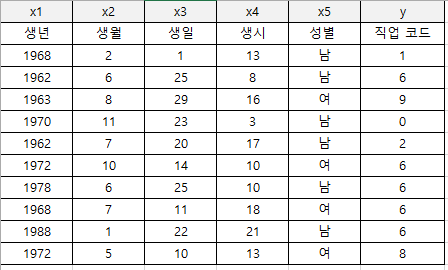